# Qing

Consider the Qing function
 \begin{equation}
 \label{eq:model}
f(x)=\sum_{i=1}^{d} (x_i^2 - i)^2,
\end{equation}
where $x \in \mathfrak{X}=[-3,3]^d$.

The gradient of the Qing function is

\begin{equation}
\nabla f(x_i)= 4x_i (x_i^2 - i).
\end{equation}



# Import libraries

In [1]:
import numpy as np 
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import textwrap

import metod_alg as mt
from metod_alg import metod_algorithm_functions as mt_alg
from metod_alg import objective_functions as mt_obj
import tqdm
import seaborn as sns
import SALib
from SALib.sample import sobol_sequence

# Contour Plot

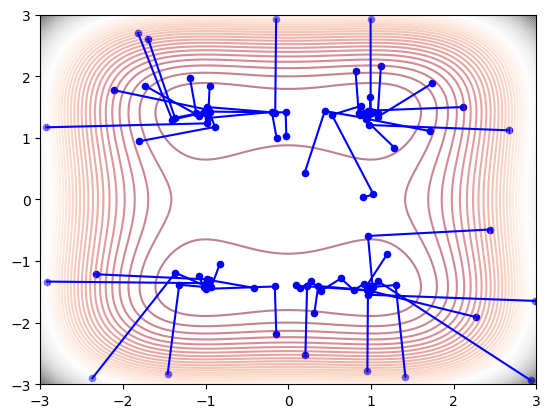

In [2]:
np.random.seed(18)
test_num = 100
bounds_p_1 = -3
bounds_p_2 = 3
num_p = 40
f = mt_obj.qing_function
g = mt_obj.qing_gradient
d = 2
args = (d, )
x = np.linspace(bounds_p_1, bounds_p_2, test_num)
y = np.linspace(bounds_p_1, bounds_p_2, test_num)
Z = np.zeros((test_num, test_num))
X, Y = np.meshgrid(x, y)
for i in range(test_num):
    for j in range(test_num):
        x1_var = X[i, j]
        x2_var = Y[i, j]
        Z[i, j] = f(np.array([x1_var, x2_var]).reshape(2, ), *args)

relax_sd_it = 1
usage = 'metod_algorithm'
tolerance=0.0001
projection=False
option = 'forward_backward_tracking'
met = 'None'
initial_guess=0.005

for _ in range(num_p):
    x = np.random.uniform(bounds_p_1, bounds_p_2, (d,))
    descended_x_points, its = (mt_alg.apply_sd_until_stopping_criteria
                              (x, d, projection, tolerance, option,
                               met, initial_guess, args, f, g, 
                               bounds_p_1, bounds_p_2, usage, relax_sd_it))

    chosen_x1 = descended_x_points[0:descended_x_points.shape[0]][:,0]
    chosen_x2 = descended_x_points[0:descended_x_points.shape[0]][:,1]

    plt.scatter(chosen_x1, chosen_x2, s=20, color='blue')
    plt.plot(chosen_x1, chosen_x2, 'blue')

plt.contour(X, Y, Z, 50, cmap='RdGy', alpha=0.5)

# Results

For all results $d=5$ and $N=500$.

In [195]:
d = 5
beta_list = [0.001, 0.01]
m_list = [1, 2, 3]
global_minimum = 0
avg_grad = np.zeros((len(m_list) * len(beta_list), 100, 500))

total_no_local_minimizers_metod = np.zeros((len(m_list), len(beta_list), 100))
time_taken_metod = np.zeros((len(m_list), len(beta_list), 100))
extra_descents_metod = np.zeros((len(m_list), len(beta_list), 100))
func_val_metod = np.zeros((len(m_list), len(beta_list), 100))

df_mult = pd.read_csv('qing_sd_metod_beta_0.1_m=1_d=5_random_500.csv')
total_no_local_minimizers_mult = np.array(df_mult['number_minimizers_per_func_multistart'])
time_taken_mult = np.array(df_mult['time_multistart'])
func_val_mult = np.array(df_mult['min_func_val_multistart'])
test = np.array(df_mult['number_minimizers_per_func_metod'])

index_all = 0
index_m = 0
for m in m_list:
    index_beta = 0
    for beta in beta_list:
        df_metod = pd.read_csv('qing_metod_beta_%s_m=%s_d=5_random_500.csv'% (beta, m))
        total_no_local_minimizers_metod[index_m, index_beta] = np.array(df_metod['number_minimizers_per_func_metod'])
        time_taken_metod[index_m, index_beta] = np.array(df_metod['time_metod'])
        func_val_metod[index_m, index_beta] = np.array(df_metod['min_func_val_metod'])
        if beta == 0.1 and m == 1:
            assert(np.all(total_no_local_minimizers_metod[index] == test))
        extra_descents_metod[index_m, index_beta] = np.array(df_metod['number_extra_descents_per_func_metod'])

        avg_grad[index_all] = np.genfromtxt('qing_grad_norm_beta_%s_m=%s_d=5_random_500.csv'% (beta, m), delimiter=',')
        index_beta += 1
        index_all += 1
    index_m += 1

In [198]:
total_no_minimizers_prop = total_no_local_minimizers_metod / total_no_local_minimizers_mult
total_no_minimizers_prop

array([[[0.84375, 0.78125, 0.9375 , 0.84375, 0.78125, 0.9375 , 0.84375,
         0.9375 , 0.78125, 0.90625, 0.78125, 0.6875 , 0.90625, 0.875  ,
         0.875  , 0.90625, 0.65625, 0.90625, 0.9375 , 0.90625, 0.78125,
         0.9375 , 0.84375, 0.75   , 0.8125 , 0.8125 , 0.84375, 0.84375,
         0.875  , 0.875  , 0.875  , 0.84375, 0.875  , 0.90625, 0.90625,
         0.84375, 0.9375 , 0.78125, 0.84375, 0.78125, 0.90625, 0.875  ,
         0.84375, 0.9375 , 0.875  , 0.71875, 0.71875, 0.78125, 0.90625,
         0.8125 , 0.84375, 0.90625, 0.84375, 0.84375, 0.84375, 0.9375 ,
         0.875  , 0.8125 , 0.78125, 0.875  , 0.78125, 0.84375, 0.875  ,
         0.8125 , 0.8125 , 0.90625, 0.84375, 0.875  , 0.90625, 0.875  ,
         0.9375 , 0.84375, 0.875  , 0.9375 , 0.75   , 0.875  , 0.8125 ,
         0.71875, 0.90625, 0.9375 , 0.875  , 0.90625, 0.78125, 0.78125,
         0.875  , 0.9375 , 0.90625, 0.84375, 0.8125 , 0.96875, 0.90625,
         0.875  , 0.875  , 0.875  , 0.90625, 0.875  , 0.8125 , 0

In [203]:
time_taken_prop = time_taken_metod / time_taken_mult

In [207]:
for j in range(len(beta_list) * len(m_list)):
    for k in range(j+1, len(beta_list) * len(m_list)):
            assert(np.all(np.round(avg_grad[k], 5) == np.round(avg_grad[j], 5)))

In [209]:
same_global_min = np.zeros((len(m_list), len(beta_list)))
same_minimizer = np.zeros((len(m_list), len(beta_list)))
mean_excessive_descents = np.zeros((len(m_list), len(beta_list)))
for i in range(len(m_list)):
    for j in range(len(beta_list)):
        assert(np.all(total_no_local_minimizers_mult >=  total_no_local_minimizers_metod[i, j]))
        same_global_min[i, j] = np.where(np.round(func_val_mult, 2) == np.round(func_val_metod[i, j], 2))[0].shape[0]
        same_minimizer[i, j] = np.sum(total_no_local_minimizers_metod[i, j]) / np.sum(total_no_local_minimizers_mult)
        mean_excessive_descents[i, j] = np.mean(extra_descents_metod[i, j])

In [210]:
same_global_min

array([[100., 100.],
       [100., 100.],
       [100., 100.]])

In [211]:
same_minimizer

array([[0.855625 , 0.87     ],
       [0.978125 , 0.9803125],
       [0.989375 , 0.9909375]])

In [212]:
mean_excessive_descents

array([[15.63, 17.35],
       [21.73, 23.24],
       [14.41, 15.24]])

In [213]:
number_its = np.genfromtxt('qing_no_its_mult_beta_0.1_m=1_d=5_random_500.csv', delimiter=',')
store_mean_its = np.zeros((100))
store_min_its = np.zeros((100))
store_mean_norm_grad = np.zeros((100))
for j in range(100):
    store_mean_its[j] = np.mean(number_its[j])
    store_min_its[j] = np.min(number_its[j])
    store_mean_norm_grad[j] = 1 / np.mean(avg_grad[0][j])

In [214]:
store_mean_its

array([25.498, 25.612, 26.08 , 25.228, 26.236, 25.892, 25.788, 25.948,
       25.984, 25.672, 25.792, 25.65 , 25.902, 25.138, 25.908, 25.816,
       25.636, 26.022, 25.962, 26.148, 25.448, 25.114, 26.074, 25.812,
       25.554, 25.898, 25.736, 25.226, 25.518, 26.016, 25.594, 25.63 ,
       25.714, 25.56 , 25.94 , 25.69 , 25.668, 25.628, 25.196, 25.992,
       26.084, 25.736, 25.924, 25.39 , 25.624, 25.774, 25.902, 25.424,
       25.484, 25.784, 26.288, 25.464, 25.748, 25.798, 25.69 , 25.696,
       25.846, 25.828, 25.592, 26.254, 26.   , 26.274, 25.516, 26.208,
       25.708, 25.474, 25.39 , 26.118, 25.614, 25.856, 25.59 , 25.95 ,
       25.572, 25.42 , 25.306, 26.024, 26.13 , 25.716, 25.596, 26.086,
       25.858, 26.268, 25.902, 26.146, 25.81 , 25.432, 25.644, 25.936,
       25.788, 25.468, 25.556, 25.814, 26.16 , 26.152, 26.066, 25.72 ,
       25.958, 25.596, 25.636, 25.824])

In [215]:
store_min_its

array([14., 14., 14., 13., 13., 13., 12., 13., 13., 14., 13., 13., 13.,
       13., 13., 12., 13., 14., 14., 14., 13., 12., 12., 13., 13., 13.,
       13., 14., 12., 14., 13., 12., 13., 12., 14., 11., 11., 12., 13.,
       13., 13., 13., 13., 14., 13., 14., 13., 14., 13., 14., 14., 13.,
       13., 12., 14., 14., 14., 12., 14., 12., 16., 10., 13., 13., 12.,
       12., 11., 13., 14., 14., 13., 12., 13., 13., 12., 12., 13., 15.,
       13., 14., 13., 13., 13., 13., 14., 12., 14., 14., 14., 12., 12.,
       13., 10., 14., 13., 13., 12., 13., 12., 14.])

In [216]:
store_mean_norm_grad

array([0.01927709, 0.0202515 , 0.01967815, 0.0196368 , 0.02012379,
       0.0201358 , 0.01931056, 0.02022005, 0.01972478, 0.01981728,
       0.02008569, 0.02008885, 0.02053815, 0.01929123, 0.01909728,
       0.01941487, 0.01957029, 0.02015323, 0.0210906 , 0.01978659,
       0.02008147, 0.0198673 , 0.01898685, 0.01884485, 0.02051043,
       0.02004711, 0.01916705, 0.01883781, 0.02009654, 0.02007389,
       0.02008632, 0.02036593, 0.02028188, 0.01998895, 0.02025072,
       0.01965958, 0.01975114, 0.01978758, 0.02031592, 0.01995118,
       0.02004902, 0.01972063, 0.01968199, 0.01993006, 0.02063483,
       0.01955232, 0.02025438, 0.01963725, 0.02016557, 0.01943683,
       0.02059688, 0.0204396 , 0.01912751, 0.01989621, 0.01947925,
       0.01953733, 0.02015075, 0.02015007, 0.02027134, 0.01999445,
       0.02013285, 0.02007633, 0.01925142, 0.02054635, 0.01990478,
       0.01961525, 0.01957647, 0.02027284, 0.01931409, 0.0195672 ,
       0.02037316, 0.02013718, 0.02000049, 0.02046427, 0.02018

In [174]:
def set_box_color(bp, color):
    """Set colour for boxplot."""
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
def create_boxplots_ratio(arr1, arr2, arr3, labels, ticks):
    plt.figure(figsize=(7, 5))
    
    max_num = max(np.max(arr1), np.max(arr2))
    plt.ylim(0, max_num + 0.1)
    bpl = plt.boxplot(arr1.T,
                      positions=np.array(range(len(arr1)))*2.0-0.6)
    bpc = plt.boxplot(arr2.T,
                      positions=np.array(range(len(arr2)))*2.0)
    bpr = plt.boxplot(arr2.T,
                      positions=np.array(range(len(arr2)))*2.0+ 0.6)
    set_box_color(bpl, 'green')
    set_box_color(bpc, 'navy')
    set_box_color(bpr, 'purple')
    plt.plot([], c='green', label=labels[0])
    plt.plot([], c='navy', label=labels[1])
    plt.plot([], c='purple', label=labels[2])
    plt.legend(bbox_to_anchor=(0.99, 1.025), loc='upper left',
               prop={'size': 15})
    plt.xlabel(r'$\beta$', size=14)
    plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks, size=15)
    plt.yticks(fontsize=14)
    plt.tight_layout()

# Total number of local minima

In [175]:
ticks = [beta_list[0],
          beta_list[1]]
labels = [r'$M =$ %s' % (m_list[0]),
        r'$M =$ %s' % (m_list[1]),
         r'$M =$ %s' % (m_list[2])]

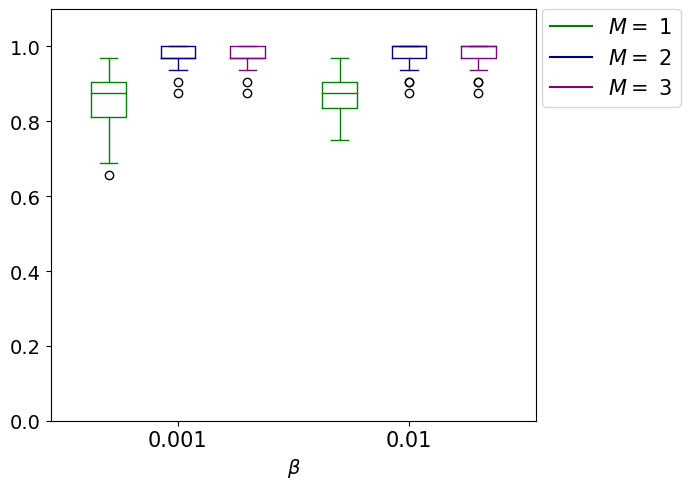

In [217]:
create_boxplots_ratio(total_no_minimizers_prop[0],
                      total_no_minimizers_prop[1],
                      total_no_minimizers_prop[2],
                      labels, ticks)

# Efficiency

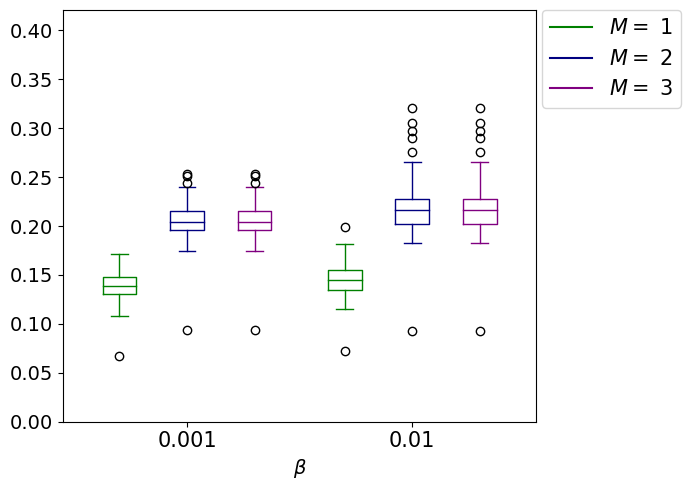

In [218]:
create_boxplots_ratio(time_taken_prop[0],
                      time_taken_prop[1],
                      time_taken_prop[2],
                      labels, ticks)

# Excessive descents

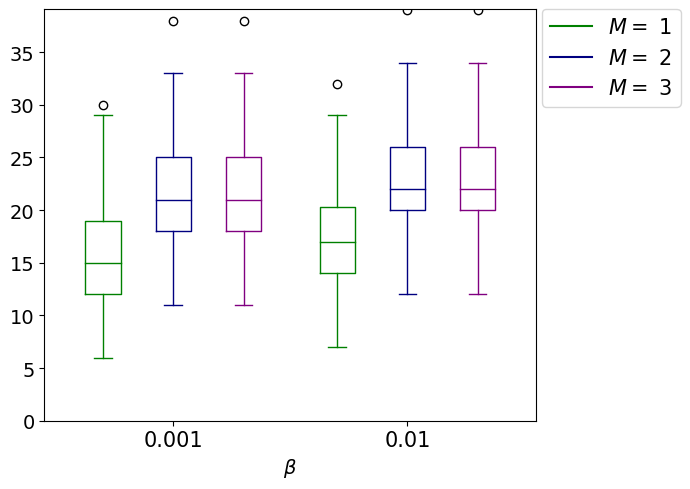

In [219]:
create_boxplots_ratio(extra_descents_metod[0],
                      extra_descents_metod[1],
                      extra_descents_metod[2],
                      labels, ticks)